In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os, shutil
import time
import matplotlib.pyplot as plt
import scipy
import numpy as np
from PIL import Image
from scipy import ndimage
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import models
from keras import layers
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.layers.core import Flatten, Dense, Dropout
from keras.applications.vgg16 import VGG16
from keras.applications.nasnet import NASNetMobile
from keras.applications.inception_v3 import InceptionV3
from keras.applications.densenet import DenseNet201
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [0]:
# directories of original images downloaded from the links found in the csv file
new_dir = '/content/gdrive/My Drive/Colab Notebooks/split/'
train_folder = os.path.join(new_dir, 'train')
test_folder = os.path.join(new_dir, 'test')
val_folder = os.path.join(new_dir, 'validation')

In [0]:
# create image generator to feed batches of images into the convolutional layer
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(64, 64), 
        batch_size = 50,
        ) 


val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(64, 64),
        batch_size = 50,
        )


train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_folder, 
        target_size=(64, 64), 
        batch_size = 50, 
        )

Found 250 images belonging to 5 classes.
Found 200 images belonging to 5 classes.
Found 1350 images belonging to 5 classes.


In [0]:
# 4 Convolution/Max Pooling layers and 3 Dense layers. 25 epochs and 27 steps per epoch.
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer= 'Adam',
              metrics=['acc'])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [0]:
history_1 = model.fit_generator(
      train_generator,
      steps_per_epoch=27,
      epochs=25,
      validation_data=val_generator,
      validation_steps=4)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/25
27/27 [==============================] - 342s 13s/step - loss: 1.6005 - acc: 0.2274 - val_loss: 1.6264 - val_acc: 0.2000
Epoch 2/25
27/27 [==============================] - 15s 538ms/step - loss: 1.5975 - acc: 0.2304 - val_loss: 1.6346 - val_acc: 0.2000
Epoch 3/25
27/27 [==============================] - 15s 546ms/step - loss: 1.5910 - acc: 0.2230 - val_loss: 1.6048 - val_acc: 0.2950
Epoch 4/25
27/27 [==============================] - 15s 537ms/step - loss: 1.5604 - acc: 0.3096 - val_loss: 1.5588 - val_acc: 0.3000
Epoch 5/25
27/27 [==============================] - 15s 541ms/step - loss: 1.5255 - acc: 0.3341 - val_loss: 1.5255 - val_acc: 0.3150
Epoch 6/25
27/27 [==============================] - 15s 540ms/step - loss: 1.4697 - acc: 0.3593 - val_loss: 1.4780 - val_acc: 0.3100
Epoch 7/25
27/27 [==============================] - 14s 536ms/step - loss: 1.4341 - acc: 0.3726 - val_loss: 1

In [0]:
# retrieve all images stored in the image iterator
train_images, train_labels = np.empty((0, 64, 64, 3), dtype=float), np.empty((0, 5), dtype=float) 
test_images, test_labels = np.empty((0, 64, 64, 3), dtype=float), np.empty((0, 5), dtype=float),

while train_images.shape[0] < 1350:
  tr_imgs, tr_lbls = next(train_generator)
  train_images = np.append(train_images, tr_imgs, axis=0)
  train_labels = np.append(train_labels, tr_lbls, axis=0)

while test_images.shape[0] < 250:
  t_imgs, t_lbls = next(test_generator)
  test_images = np.append(test_images, t_imgs, axis=0)
  test_labels = np.append(test_labels, t_lbls, axis=0)


In [0]:
results_train = model.evaluate(train_images, train_labels)

1350/1350 [==============================] - 0s 326us/step


In [0]:
results_test = model.evaluate(test_images, test_labels)

250/250 [==============================] - 0s 457us/step


In [0]:
results_train

[0.08965260547620278, 0.9814814814814815]

In [0]:
results_test

[3.099641632080078, 0.3720000014305115]

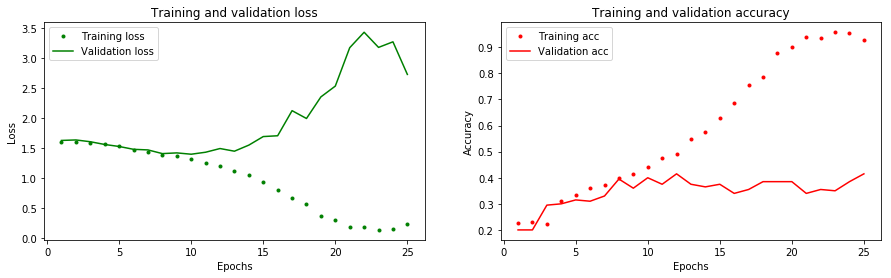

In [0]:
hist_model = history_1.history
loss_values = hist_model['loss']
val_loss_values = hist_model['val_loss']
acc_values = hist_model['acc'] 
val_acc_values = hist_model['val_acc']


epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The baseline model is overfitted (train acc. 0.98 vs. test 0.37). The validation loss creeps higher after 11 epochs while the test accuracy levels off after that point.

In [0]:
# 4 Convolution/Max Pooling layers and 3 Dense layers. 25 epochs and 27 steps per epoch
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='linear',
                        input_shape=(64 ,64,  3)))
model.add(LeakyReLU(alpha=0.1))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (4, 4), activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (4, 4), activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.4))
model.add(layers.Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.4))
model.add(layers.Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer= 'Adam',
              metrics=['acc'])

In [0]:
history_2 = model.fit_generator(
      train_generator,
      steps_per_epoch=27,
      epochs=25,
      validation_data=val_generator,
      validation_steps=4)

Epoch 1/25
27/27 [==============================] - 15s 565ms/step - loss: 2.2401 - acc: 0.2311 - val_loss: 2.8134 - val_acc: 0.2000
Epoch 2/25
27/27 [==============================] - 15s 540ms/step - loss: 2.0975 - acc: 0.2185 - val_loss: 2.5264 - val_acc: 0.1950
Epoch 3/25
27/27 [==============================] - 15s 540ms/step - loss: 1.9772 - acc: 0.2393 - val_loss: 1.7868 - val_acc: 0.2700
Epoch 4/25
27/27 [==============================] - 15s 547ms/step - loss: 1.9467 - acc: 0.2481 - val_loss: 2.3055 - val_acc: 0.2000
Epoch 5/25
27/27 [==============================] - 15s 548ms/step - loss: 1.8467 - acc: 0.2585 - val_loss: 1.7633 - val_acc: 0.2300
Epoch 6/25
27/27 [==============================] - 15s 550ms/step - loss: 1.8034 - acc: 0.2904 - val_loss: 5.0197 - val_acc: 0.1950
Epoch 7/25
27/27 [==============================] - 15s 552ms/step - loss: 1.7426 - acc: 0.3141 - val_loss: 2.1667 - val_acc: 0.2700
Epoch 8/25
27/27 [==============================] - 15s 545ms/step - 

In [0]:
results_train = model.evaluate(train_images, train_labels)

1350/1350 [==============================] - 1s 700us/step


In [0]:
results_test = model.evaluate(test_images, test_labels)

250/250 [==============================] - 0s 817us/step


In [0]:
results_train

[1.5235772925836069, 0.44444444448859605]

In [0]:
results_test

[2.4254564151763915, 0.34800000095367434]

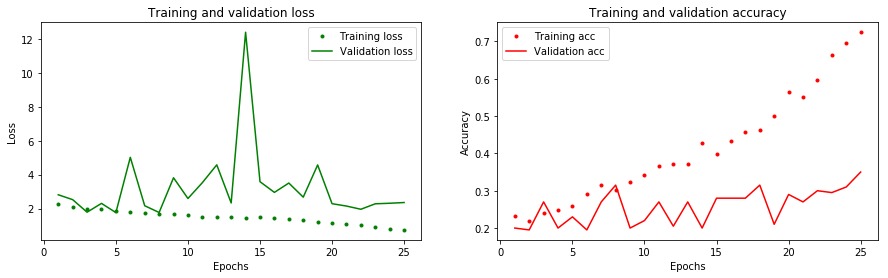

In [0]:
hist_model = history_2.history
loss_values = hist_model['loss']
val_loss_values = hist_model['val_loss']
acc_values = hist_model['acc'] 
val_acc_values = hist_model['val_acc']


epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The model is less overfitted but the test accuracy dropped to 0.35.

In [0]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(244, 244), 
        batch_size = 50,
        ) 


val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(244, 244),
        batch_size = 50,
        )


train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_folder, 
        target_size=(244, 244), 
        batch_size = 50, 
        )

Found 250 images belonging to 5 classes.
Found 200 images belonging to 5 classes.
Found 1350 images belonging to 5 classes.


In [0]:
# Transfer learning with vgg16 base and one fully-connected layer
base_model = VGG16(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])


58892288/58889256 [==============================] - 1s 0us/step


In [0]:
history_3 = model.fit_generator(
      train_generator,
      steps_per_epoch=27,
      epochs=20,
      validation_data=val_generator,
      validation_steps=4)

Epoch 1/20
27/27 [==============================] - 25s 920ms/step - loss: 1.7165 - acc: 0.2630 - val_loss: 1.6430 - val_acc: 0.2100
Epoch 2/20
27/27 [==============================] - 18s 683ms/step - loss: 1.4659 - acc: 0.3681 - val_loss: 1.4108 - val_acc: 0.4250
Epoch 3/20
27/27 [==============================] - 19s 686ms/step - loss: 1.3708 - acc: 0.4244 - val_loss: 1.4604 - val_acc: 0.3800
Epoch 4/20
27/27 [==============================] - 19s 688ms/step - loss: 1.2711 - acc: 0.4933 - val_loss: 1.4594 - val_acc: 0.4000
Epoch 5/20
27/27 [==============================] - 19s 687ms/step - loss: 1.2072 - acc: 0.5193 - val_loss: 1.2535 - val_acc: 0.4950
Epoch 6/20
27/27 [==============================] - 19s 688ms/step - loss: 1.1372 - acc: 0.5556 - val_loss: 1.2862 - val_acc: 0.5150
Epoch 7/20
27/27 [==============================] - 19s 688ms/step - loss: 1.1095 - acc: 0.5689 - val_loss: 1.2905 - val_acc: 0.5050
Epoch 8/20
27/27 [==============================] - 19s 688ms/step - 

In [0]:
train_images, train_labels = np.empty((0, 244, 244, 3), dtype=float), np.empty((0, 5), dtype=float) 
test_images, test_labels = np.empty((0, 244, 244, 3), dtype=float), np.empty((0, 5), dtype=float),

while train_images.shape[0] < 1350:
  tr_imgs, tr_lbls = next(train_generator)
  train_images = np.append(train_images, tr_imgs, axis=0)
  train_labels = np.append(train_labels, tr_lbls, axis=0)

while test_images.shape[0] < 250:
  t_imgs, t_lbls = next(test_generator)
  test_images = np.append(test_images, t_imgs, axis=0)
  test_labels = np.append(test_labels, t_lbls, axis=0)


In [0]:
results_train = model.evaluate(train_images, train_labels)

1350/1350 [==============================] - 20s 15ms/step


In [0]:
results_test = model.evaluate(test_images, test_labels)

250/250 [==============================] - 6s 23ms/step


In [0]:
results_train

[0.7724286602161549, 0.7007407407407408]

In [0]:
results_test

[1.1250886144638061, 0.5879999995231628]

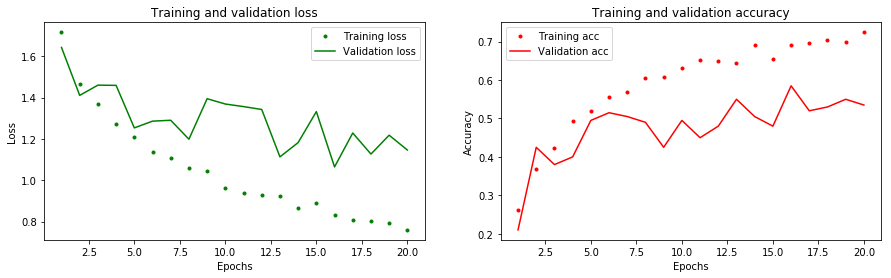

In [0]:
hist_model = history_3.history
loss_values = hist_model['loss']
val_loss_values = hist_model['val_loss']
acc_values = hist_model['acc'] 
val_acc_values = hist_model['val_acc']


epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

This is a better model but the test accuracy is just 0.59.

In [0]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(299, 299), 
        batch_size = 250,
        ) 


val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(299, 299),
        batch_size = 50,
        )


train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_folder, 
        target_size=(299, 299), 
        batch_size = 50, 
        )

Found 250 images belonging to 5 classes.
Found 200 images belonging to 5 classes.
Found 1350 images belonging to 5 classes.


In [0]:
# transfer learning with InceptionV3 convolutional base and a fully-connected layer
base_model = InceptionV3(weights='imagenet', include_top=False, classes=5)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])


In [0]:
history_4 = model.fit_generator(
      train_generator,
      steps_per_epoch=27,
      epochs=20,
      validation_data=val_generator,
      validation_steps=4)

Epoch 1/20
27/27 [==============================] - 28s 1s/step - loss: 9.8820 - acc: 0.2126 - val_loss: 10.5749 - val_acc: 0.2000
Epoch 2/20
27/27 [==============================] - 16s 575ms/step - loss: 9.7283 - acc: 0.2459 - val_loss: 11.2924 - val_acc: 0.2000
Epoch 3/20
27/27 [==============================] - 17s 639ms/step - loss: 2.1313 - acc: 0.3170 - val_loss: 1.5952 - val_acc: 0.3000
Epoch 4/20
27/27 [==============================] - 18s 656ms/step - loss: 1.3708 - acc: 0.4637 - val_loss: 2.0088 - val_acc: 0.3250
Epoch 5/20
27/27 [==============================] - 18s 668ms/step - loss: 1.2964 - acc: 0.5052 - val_loss: 1.5150 - val_acc: 0.5200
Epoch 6/20
27/27 [==============================] - 17s 647ms/step - loss: 1.1847 - acc: 0.5600 - val_loss: 1.9327 - val_acc: 0.4550
Epoch 7/20
27/27 [==============================] - 18s 655ms/step - loss: 1.0621 - acc: 0.5993 - val_loss: 1.4210 - val_acc: 0.4500
Epoch 8/20
27/27 [==============================] - 17s 648ms/step - l

In [0]:
train_images, train_labels = np.empty((0, 299, 299, 3), dtype=float), np.empty((0, 5), dtype=float) 
test_images, test_labels = np.empty((0, 299, 299, 3), dtype=float), np.empty((0, 5), dtype=float),

while train_images.shape[0] < 1350:
  tr_imgs, tr_lbls = next(train_generator)
  train_images = np.append(train_images, tr_imgs, axis=0)
  train_labels = np.append(train_labels, tr_lbls, axis=0)

while test_images.shape[0] < 250:
  t_imgs, t_lbls = next(test_generator)
  test_images = np.append(test_images, t_imgs, axis=0)
  test_labels = np.append(test_labels, t_lbls, axis=0)

In [0]:
results_train = model.evaluate(train_images, train_labels)

1350/1350 [==============================] - 17s 13ms/step


In [0]:
results_test = model.evaluate(test_images, test_labels)

250/250 [==============================] - 4s 18ms/step


In [0]:
results_train

[0.8097993278061902, 0.7333333332450301]

In [0]:
results_test

[1.0339237041473388, 0.6799999985694886]

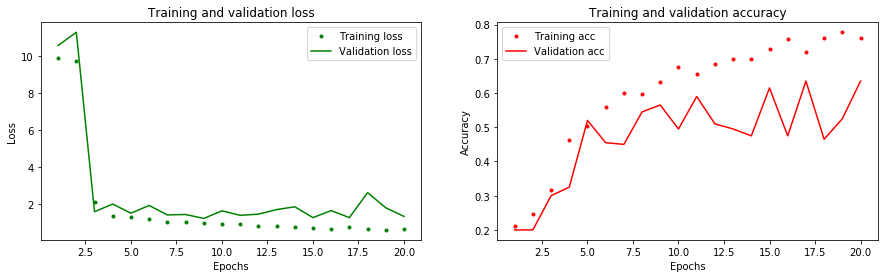

In [0]:
hist_model = history_4.history
loss_values = hist_model['loss']
val_loss_values = hist_model['val_loss']
acc_values = hist_model['acc'] 
val_acc_values = hist_model['val_acc']


epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

With a test accuracy of 0.68, this is the best model for original images. Next, we create models for cropped images.

In [0]:
# paths to directories of cropped images
new_dir_crop = '/content/gdrive/My Drive/Colab Notebooks/split2/'
train_folder = os.path.join(new_dir_crop, 'train')
test_folder = os.path.join(new_dir_crop, 'test')
val_folder = os.path.join(new_dir_crop, 'validation')

In [0]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(64, 64), 
        batch_size = 50,
        ) 


val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(64, 64),
        batch_size = 50,
        )


train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_folder, 
        target_size=(64, 64), 
        batch_size = 50, 
        )

Found 250 images belonging to 5 classes.
Found 200 images belonging to 5 classes.
Found 1359 images belonging to 5 classes.


In [0]:
#running the second model above with cropped images
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer= 'Adam',
              metrics=['acc'])

In [0]:
history_5 = model.fit_generator(
      train_generator,
      steps_per_epoch=27,
      epochs=20,
      validation_data=val_generator,
      validation_steps=4)

Epoch 1/20
27/27 [==============================] - 318s 12s/step - loss: 1.5934 - acc: 0.2202 - val_loss: 1.5930 - val_acc: 0.3350
Epoch 2/20
27/27 [==============================] - 19s 693ms/step - loss: 1.4842 - acc: 0.3479 - val_loss: 1.5153 - val_acc: 0.3100
Epoch 3/20
27/27 [==============================] - 6s 221ms/step - loss: 1.3613 - acc: 0.4178 - val_loss: 1.2865 - val_acc: 0.4750
Epoch 4/20
27/27 [==============================] - 6s 223ms/step - loss: 1.2253 - acc: 0.5000 - val_loss: 1.2749 - val_acc: 0.4650
Epoch 5/20
27/27 [==============================] - 6s 209ms/step - loss: 1.1646 - acc: 0.5314 - val_loss: 1.1985 - val_acc: 0.4950
Epoch 6/20
27/27 [==============================] - 5s 202ms/step - loss: 1.1442 - acc: 0.5545 - val_loss: 1.2514 - val_acc: 0.4800
Epoch 7/20
27/27 [==============================] - 6s 211ms/step - loss: 1.1346 - acc: 0.5514 - val_loss: 1.1494 - val_acc: 0.5350
Epoch 8/20
27/27 [==============================] - 6s 205ms/step - loss: 1

In [0]:
train_images, train_labels = np.empty((0, 64, 64, 3), dtype=float), np.empty((0, 5), dtype=float) 
test_images, test_labels = np.empty((0, 64, 64, 3), dtype=float), np.empty((0, 5), dtype=float),

while train_images.shape[0] < 1350:
  tr_imgs, tr_lbls = next(train_generator)
  train_images = np.append(train_images, tr_imgs, axis=0)
  train_labels = np.append(train_labels, tr_lbls, axis=0)

while test_images.shape[0] < 250:
  t_imgs, t_lbls = next(test_generator)
  test_images = np.append(test_images, t_imgs, axis=0)
  test_labels = np.append(test_labels, t_lbls, axis=0)


In [0]:
results_train = model.evaluate(train_images, train_labels)

1350/1350 [==============================] - 0s 311us/step


In [0]:
results_test = model.evaluate(test_images, test_labels)

250/250 [==============================] - 0s 414us/step


In [0]:
results_train

[0.5433182280151932, 0.7999999999116968]

In [0]:
results_test

[1.2588876953125, 0.6199999995231629]

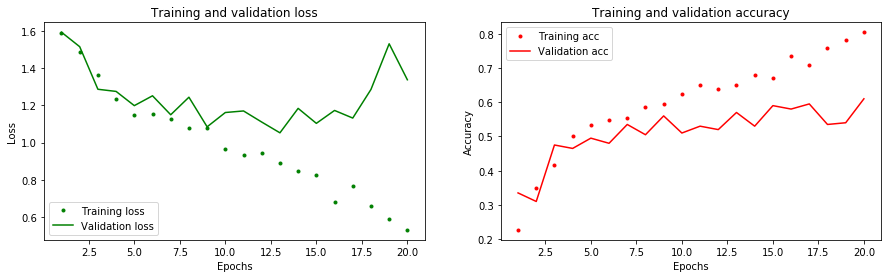

In [0]:
hist_model = history_5.history
loss_values = hist_model['loss']
val_loss_values = hist_model['val_loss']
acc_values = hist_model['acc'] 
val_acc_values = hist_model['val_acc']


epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The validation loss stopped dropping after epoch 13. Test accuracy is only 0.62.

In [0]:
chanDim = -1

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='linear',
                        input_shape=(64 ,64,  3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (4, 4), activation='relu', padding='same'))
model.add(BatchNormalization(axis=chanDim))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization(axis=chanDim))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(128, (4, 4), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.4))
model.add(layers.Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.4))
model.add(layers.Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer= 'Adam',
              metrics=['acc'])

In [0]:
history_6 = model.fit_generator(
      train_generator,
      steps_per_epoch=27,
      epochs=25,
      validation_data=val_generator,
      validation_steps=4)

Epoch 1/25
27/27 [==============================] - 12s 439ms/step - loss: 2.1470 - acc: 0.2901 - val_loss: 2.3871 - val_acc: 0.3250
Epoch 2/25
27/27 [==============================] - 6s 221ms/step - loss: 1.8202 - acc: 0.3347 - val_loss: 2.1280 - val_acc: 0.3050
Epoch 3/25
27/27 [==============================] - 6s 226ms/step - loss: 1.6814 - acc: 0.3724 - val_loss: 1.8044 - val_acc: 0.2900
Epoch 4/25
27/27 [==============================] - 6s 226ms/step - loss: 1.5274 - acc: 0.4087 - val_loss: 1.8246 - val_acc: 0.3350
Epoch 5/25
27/27 [==============================] - 6s 223ms/step - loss: 1.4785 - acc: 0.4218 - val_loss: 2.2935 - val_acc: 0.3250
Epoch 6/25
27/27 [==============================] - 6s 214ms/step - loss: 1.3585 - acc: 0.4802 - val_loss: 1.3926 - val_acc: 0.4400
Epoch 7/25
27/27 [==============================] - 6s 226ms/step - loss: 1.2828 - acc: 0.5074 - val_loss: 1.7607 - val_acc: 0.3850
Epoch 8/25
27/27 [==============================] - 6s 216ms/step - loss: 1

In [0]:
results_train = model.evaluate(train_images, train_labels)

1350/1350 [==============================] - 2s 1ms/step


In [0]:
results_test = model.evaluate(test_images, test_labels)

250/250 [==============================] - 1s 2ms/step


In [0]:
results_train

[0.9070909286428381, 0.6688888889330404]

In [0]:
results_test

[1.5359617481231689, 0.5680000023841858]

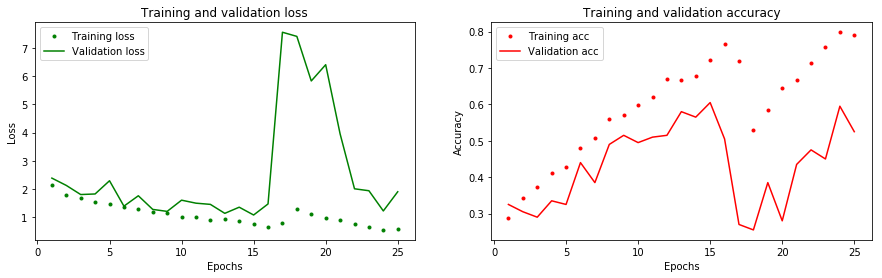

In [0]:
hist_model = history_6.history
loss_values = hist_model['loss']
val_loss_values = hist_model['val_loss']
acc_values = hist_model['acc'] 
val_acc_values = hist_model['val_acc']


epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

There is an unusual spike in validation loss between epoch 17 and 20. Test accuracy dropped to 0.57.

In [0]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(244, 244), 
        batch_size = 250,
        ) 


val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(244, 244),
        batch_size = 50,
        )


train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_folder, 
        target_size=(244, 244), 
        batch_size = 50, 
        )

Found 250 images belonging to 5 classes.
Found 200 images belonging to 5 classes.
Found 1359 images belonging to 5 classes.


In [0]:
base_model = VGG16(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])


In [0]:
history_7 = model.fit(
      train_generator,
      epochs=10,
      steps_per_epoch=27,
      validation_data=val_generator,
      validation_steps=4)

Epoch 1/10
27/27 [==============================] - 46s 2s/step - loss: 1.2311 - acc: 0.5459 - val_loss: 0.9551 - val_acc: 0.6950
Epoch 2/10
27/27 [==============================] - 19s 688ms/step - loss: 0.7900 - acc: 0.7486 - val_loss: 0.9151 - val_acc: 0.6200
Epoch 3/10
27/27 [==============================] - 19s 689ms/step - loss: 0.6687 - acc: 0.7678 - val_loss: 0.5410 - val_acc: 0.8350
Epoch 4/10
27/27 [==============================] - 19s 696ms/step - loss: 0.6005 - acc: 0.7848 - val_loss: 0.5499 - val_acc: 0.8300
Epoch 5/10
27/27 [==============================] - 19s 696ms/step - loss: 0.5731 - acc: 0.8029 - val_loss: 0.4874 - val_acc: 0.8450
Epoch 6/10
27/27 [==============================] - 19s 699ms/step - loss: 0.5046 - acc: 0.8250 - val_loss: 0.5144 - val_acc: 0.8200
Epoch 7/10
27/27 [==============================] - 19s 707ms/step - loss: 0.4537 - acc: 0.8430 - val_loss: 0.4665 - val_acc: 0.8550
Epoch 8/10
27/27 [==============================] - 18s 685ms/step - los

In [0]:
train_images, train_labels = np.empty((0, 244, 244, 3), dtype=float), np.empty((0, 5), dtype=float) 
test_images, test_labels = np.empty((0, 244, 244, 3), dtype=float), np.empty((0, 5), dtype=float),

while train_images.shape[0] < 1350:
  tr_imgs, tr_lbls = next(train_generator)
  train_images = np.append(train_images, tr_imgs, axis=0)
  train_labels = np.append(train_labels, tr_lbls, axis=0)

while test_images.shape[0] < 250:
  t_imgs, t_lbls = next(test_generator)
  test_images = np.append(test_images, t_imgs, axis=0)
  test_labels = np.append(test_labels, t_lbls, axis=0)


In [0]:
results_train = model.evaluate(train_images, train_labels)

1359/1359 [==============================] - 18s 13ms/step


In [0]:
results_test = model.evaluate(test_images, test_labels)

250/250 [==============================] - 3s 12ms/step


In [0]:
results_train

[0.330835434248379, 0.8896247241495285]

In [0]:
results_test

[0.49663768148422244, 0.8239999985694886]

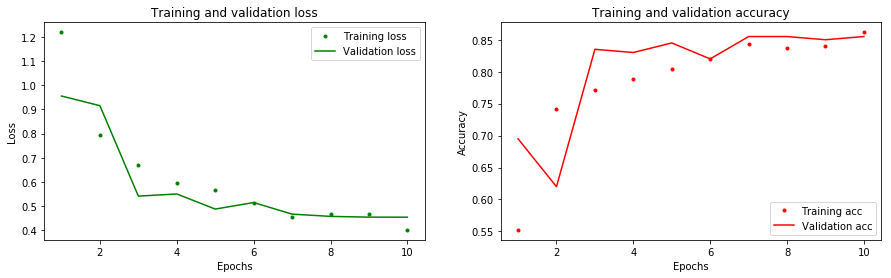

In [0]:
hist_model = history_7.history
loss_values = hist_model['loss']
val_loss_values = hist_model['val_loss']
acc_values = hist_model['acc'] 
val_acc_values = hist_model['val_acc']


epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

This is really promising model with nice validation loss graph. The test accuracy is 0.82.

In [0]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(299, 299), 
        batch_size = 250,
        ) 


val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(299, 299),
        batch_size = 50,
        )


train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_folder, 
        target_size=(299, 299), 
        batch_size = 50, 
        )

Found 250 images belonging to 5 classes.
Found 200 images belonging to 5 classes.
Found 1359 images belonging to 5 classes.


In [0]:
base_model = InceptionV3(weights='imagenet', include_top=False, classes=5)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['acc'])


In [0]:
history_8 = model.fit(
      train_generator,
      epochs=10,
      steps_per_epoch=27,
      validation_data=val_generator,
      validation_steps=4)

Epoch 1/10
27/27 [==============================] - 32s 1s/step - loss: 1.7832 - acc: 0.4018 - val_loss: 1.0756 - val_acc: 0.6500
Epoch 2/10
27/27 [==============================] - 14s 523ms/step - loss: 0.8099 - acc: 0.7491 - val_loss: 0.7647 - val_acc: 0.7500
Epoch 3/10
27/27 [==============================] - 14s 525ms/step - loss: 0.6130 - acc: 0.8022 - val_loss: 0.6971 - val_acc: 0.7500
Epoch 4/10
27/27 [==============================] - 14s 528ms/step - loss: 0.4895 - acc: 0.8376 - val_loss: 0.8240 - val_acc: 0.6950
Epoch 5/10
27/27 [==============================] - 14s 528ms/step - loss: 0.4511 - acc: 0.8493 - val_loss: 0.6362 - val_acc: 0.7750
Epoch 6/10
27/27 [==============================] - 14s 528ms/step - loss: 0.3965 - acc: 0.8590 - val_loss: 1.0454 - val_acc: 0.6200
Epoch 7/10
27/27 [==============================] - 14s 527ms/step - loss: 0.4123 - acc: 0.8570 - val_loss: 0.6105 - val_acc: 0.7350
Epoch 8/10
27/27 [==============================] - 14s 528ms/step - los

In [0]:
train_images, train_labels = np.empty((0, 299, 299, 3), dtype=float), np.empty((0, 5), dtype=float) 
test_images, test_labels = np.empty((0, 299, 299, 3), dtype=float), np.empty((0, 5), dtype=float),

while train_images.shape[0] < 1350:
  tr_imgs, tr_lbls = next(train_generator)
  train_images = np.append(train_images, tr_imgs, axis=0)
  train_labels = np.append(train_labels, tr_lbls, axis=0)

while test_images.shape[0] < 250:
  t_imgs, t_lbls = next(test_generator)
  test_images = np.append(test_images, t_imgs, axis=0)
  test_labels = np.append(test_labels, t_lbls, axis=0)


In [0]:
results_train = model.evaluate(train_images, train_labels)

1350/1350 [==============================] - 15s 11ms/step


In [0]:
results_test = model.evaluate(test_images, test_labels)

250/250 [==============================] - 3s 11ms/step


In [0]:
results_train

[0.5693763185651214, 0.8081481481481482]

In [0]:
results_test

[0.6745792014598846, 0.7760000004768371]

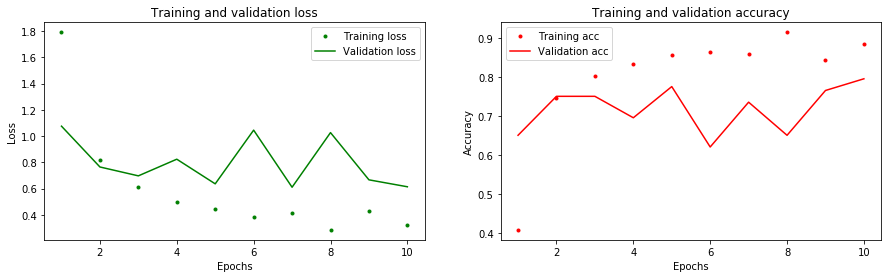

In [0]:
hist_model = history_8.history
loss_values = hist_model['loss']
val_loss_values = hist_model['val_loss']
acc_values = hist_model['acc'] 
val_acc_values = hist_model['val_acc']


epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

This is the 2nd best of all the models trained so far.

In [0]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(224, 224), 
        batch_size = 50,
        ) 


val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(224, 224),
        batch_size = 50,
        )


train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_folder, 
        target_size=(224, 224), 
        batch_size = 50, 
        )

Found 250 images belonging to 5 classes.
Found 200 images belonging to 5 classes.
Found 1359 images belonging to 5 classes.


In [0]:
base_model = NASNetMobile(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])


19996672/19993432 [==============================] - 0s 0us/step


In [0]:
history_9 = model.fit(
      train_generator,
      epochs=10,
      steps_per_epoch=27,
      validation_data=val_generator,
      validation_steps=4)

Epoch 1/10
27/27 [==============================] - 32s 1s/step - loss: 1.8990 - acc: 0.4674 - val_loss: 1.5368 - val_acc: 0.3800
Epoch 2/10
27/27 [==============================] - 8s 303ms/step - loss: 0.9726 - acc: 0.6558 - val_loss: 1.5764 - val_acc: 0.4750
Epoch 3/10
27/27 [==============================] - 8s 288ms/step - loss: 0.7896 - acc: 0.7240 - val_loss: 1.5684 - val_acc: 0.4350
Epoch 4/10
27/27 [==============================] - 8s 284ms/step - loss: 0.7182 - acc: 0.7570 - val_loss: 1.1331 - val_acc: 0.5700
Epoch 5/10
27/27 [==============================] - 7s 277ms/step - loss: 0.5612 - acc: 0.8001 - val_loss: 1.6244 - val_acc: 0.4950
Epoch 6/10
27/27 [==============================] - 7s 274ms/step - loss: 0.5594 - acc: 0.7997 - val_loss: 0.7311 - val_acc: 0.7450
Epoch 7/10
27/27 [==============================] - 8s 283ms/step - loss: 0.4185 - acc: 0.8496 - val_loss: 0.9877 - val_acc: 0.6500
Epoch 8/10
27/27 [==============================] - 7s 266ms/step - loss: 0.38

In [0]:
train_images, train_labels = np.empty((0, 224, 224, 3), dtype=float), np.empty((0, 5), dtype=float) 
test_images, test_labels = np.empty((0, 224, 224, 3), dtype=float), np.empty((0, 5), dtype=float),

while train_images.shape[0] < 1350:
  tr_imgs, tr_lbls = next(train_generator)
  train_images = np.append(train_images, tr_imgs, axis=0)
  train_labels = np.append(train_labels, tr_lbls, axis=0)

while test_images.shape[0] < 250:
  t_imgs, t_lbls = next(test_generator)
  test_images = np.append(test_images, t_imgs, axis=0)
  test_labels = np.append(test_labels, t_lbls, axis=0)


In [0]:
results_train = model.evaluate(train_images, train_labels)

1350/1350 [==============================] - 8s 6ms/step


In [0]:
results_test = model.evaluate(test_images, test_labels)

250/250 [==============================] - 2s 6ms/step


In [0]:
results_train

[0.9955193607895463, 0.6651851852293368]

In [0]:
results_test

[1.155448498725891, 0.612]

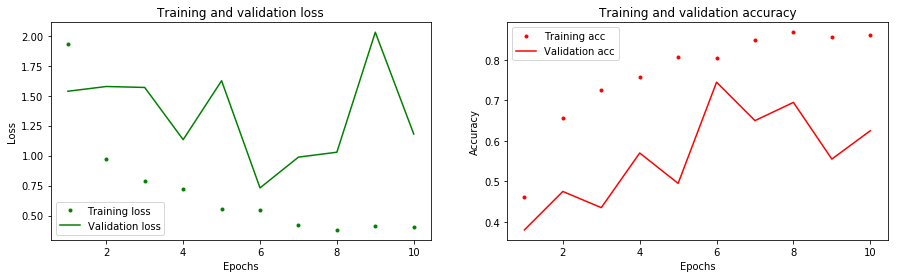

In [0]:
hist_model = history_9.history
loss_values = hist_model['loss']
val_loss_values = hist_model['val_loss']
acc_values = hist_model['acc'] 
val_acc_values = hist_model['val_acc']


epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

This is the least robust of the transfer learning model. Validation loss had a hard time keeping up with training loss.

## DenseNet Transfer Learning with Linear Discriminant Analysis Stack Hybrid

In [0]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(224, 224), 
        batch_size = 50,
        ) 


val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(224, 224),
        batch_size = 50,
        )


train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_folder, 
        target_size=(224, 224), 
        batch_size = 50, 
        )

Found 250 images belonging to 5 classes.
Found 200 images belonging to 5 classes.
Found 1359 images belonging to 5 classes.


In [0]:
train_images, train_labels = np.empty((0, 224, 224, 3), dtype=float), np.empty((0, 5), dtype=float) 
val_images, val_labels = np.empty((0, 224, 224, 3), dtype=float), np.empty((0, 5), dtype=float)
test_images, test_labels = np.empty((0, 224, 224, 3), dtype=float), np.empty((0, 5), dtype=float)

while train_images.shape[0] < 1350:
  tr_imgs, tr_lbls = next(train_generator)
  train_images = np.append(train_images, tr_imgs, axis=0)
  train_labels = np.append(train_labels, tr_lbls, axis=0)
  
while val_images.shape[0] < 200:
  v_imgs, v_lbls = next(val_generator)
  val_images = np.append(val_images, v_imgs, axis=0)
  val_labels = np.append(val_labels, v_lbls, axis=0)

while test_images.shape[0] < 250:
  t_imgs, t_lbls = next(test_generator)
  test_images = np.append(test_images, t_imgs, axis=0)
  test_labels = np.append(test_labels, t_lbls, axis=0)
  
train_images = np.append(train_images, val_images, axis=0)

In [0]:
model = DenseNet201(weights='imagenet', include_top=False)

train_features = model.predict(train_images)
test_features = model.predict(test_images)

train_features_ = train_features.reshape(1550, -1)
test_features_ = test_features.reshape(250, -1)

train_labels_ = np.array([bin(int(sum(lbl*np.array([1,2,3,4,5])))) for lbl in train_labels])
val_labels_ = np.array([bin(int(sum(lbl*np.array([1,2,3,4,5])))) for lbl in val_labels])
test_labels_ = np.array([bin(int(sum(lbl*np.array([1,2,3,4,5])))) for lbl in test_labels])

train_labels_ = np.append(train_labels_, val_labels_, axis=0)

In [0]:
lda_clf = LinearDiscriminantAnalysis()
lda_model = lda_clf.fit(train_features_, train_labels_)
predict_train_labels = lda_model.predict(train_features_)
predict_test_labels = lda_model.predict(test_features_)

print(lda_model.score(train_features_, train_labels_))
print(lda_model.score(test_features_, test_labels_))

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0.9051612903225806
0.9


In [0]:
def plot_confusion_matrix(y_true, y_pred, classes, title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    if not title:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes
    
    print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


In [0]:
class_names = list(test_generator.class_indices.keys())

In [0]:
print(classification_report(test_labels_, predict_test_labels, target_names=class_names))

              precision    recall  f1-score   support

      floral       0.98      0.90      0.94        50
       plain       0.83      0.98      0.90        50
    polkadot       0.97      0.78      0.87        50
     squares       0.92      0.90      0.91        50
     stripes       0.84      0.94      0.89        50

    accuracy                           0.90       250
   macro avg       0.91      0.90      0.90       250
weighted avg       0.91      0.90      0.90       250



Confusion matrix, without normalization
[[45  4  0  0  1]
 [ 0 49  0  1  0]
 [ 0  2 39  3  6]
 [ 0  2  1 45  2]
 [ 1  2  0  0 47]]


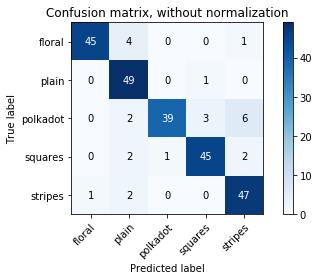

In [0]:
plot_confusion_matrix(test_labels_, predict_test_labels, classes=class_names,
                      title='Confusion matrix, without normalization')
